# Clusterização e suas Métricas

Em clusterização não existe variável resposta, nesse tipo de problema o objetivo é agrupar clusters parecidos de acordo com as variáveis.

Diferente de classificação ou regressão em problemas de clusterização tem que definir o número de clusters antes do treinamento do modelo, para isso “chutamos” os valores e olhamos as métricas para definir o valor.

### Existem duas propriedades em agrupamentos:
* **Compactness ou cluster cohesion**: os pontos do cluster devem ser compactos.
* **Separation**: os clusters devem ser distantes entre si.

![enter image description here](https://raw.githubusercontent.com/cidosjr/clustering-study/main/img/cluster_01.png)

In [6]:
# Bibliotecas
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl

from matplotlib import pyplot as plt

from sklearn import cluster as c
from sklearn.datasets import make_blobs

from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

import umap.umap_ as umap

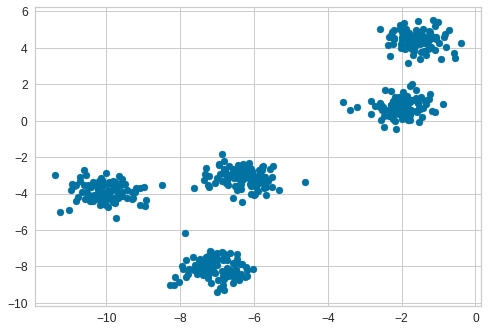

In [7]:
# Criação dataset artificial
X, y = make_blobs(n_samples=500, 
                  n_features=2, 
                  centers=5, 
                  cluster_std=0.5, 
                  center_box=(-10.0, 10.0), 
                  shuffle=True, 
                  random_state=1)

plt.scatter(X[:,0], X[:, 1]);

# Método Elbow Curve

## Within Sum of Squares
Soma todos os valores de distância, quanto menor for o valor mais compacto é o cluster, o problema do Within Sum of Squares (WSS) é que não considera a distância entre os clusters.


A Curva de Cotovelo ou Método Elbow Curve é uma técnica usada para encontrar a quantidade ideal de clusters K. Este método testa a variância dos dados em relação ao número de clusters. O valor ideal de K é aquele que tem um menor Within Sum of Squares (WSS) e ao mesmo tempo o menor número de clusters. Chamamos de curva de cotovelo, porque a partir do ponto que seria o “cotovelo” não existe uma discrepância tão significativa em termos de variância. Dessa forma, a melhor quantidade de clusters K seria exatamente onde o cotovelo estaria.

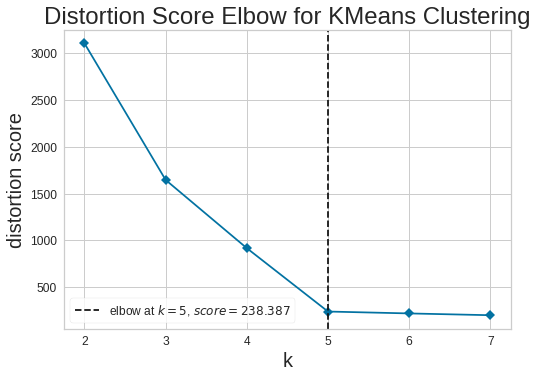

In [8]:
clusters = [2,3,4,5,6,7]

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

# Silhouette Method

Silhouette Score contempla as duas propriedades de um bom agrupamento, clusters compactos e distantes entre si.

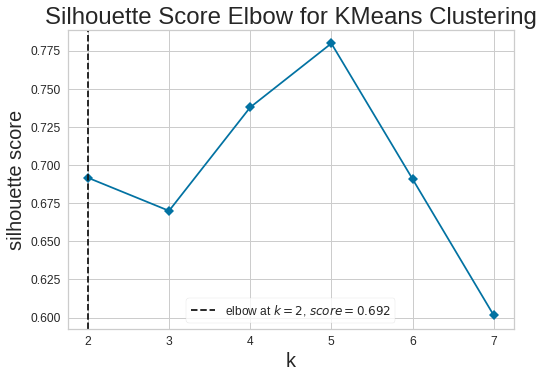

In [9]:
clusters = [2,3,4,5,6,7]

kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show();

## Silhouette Analysis

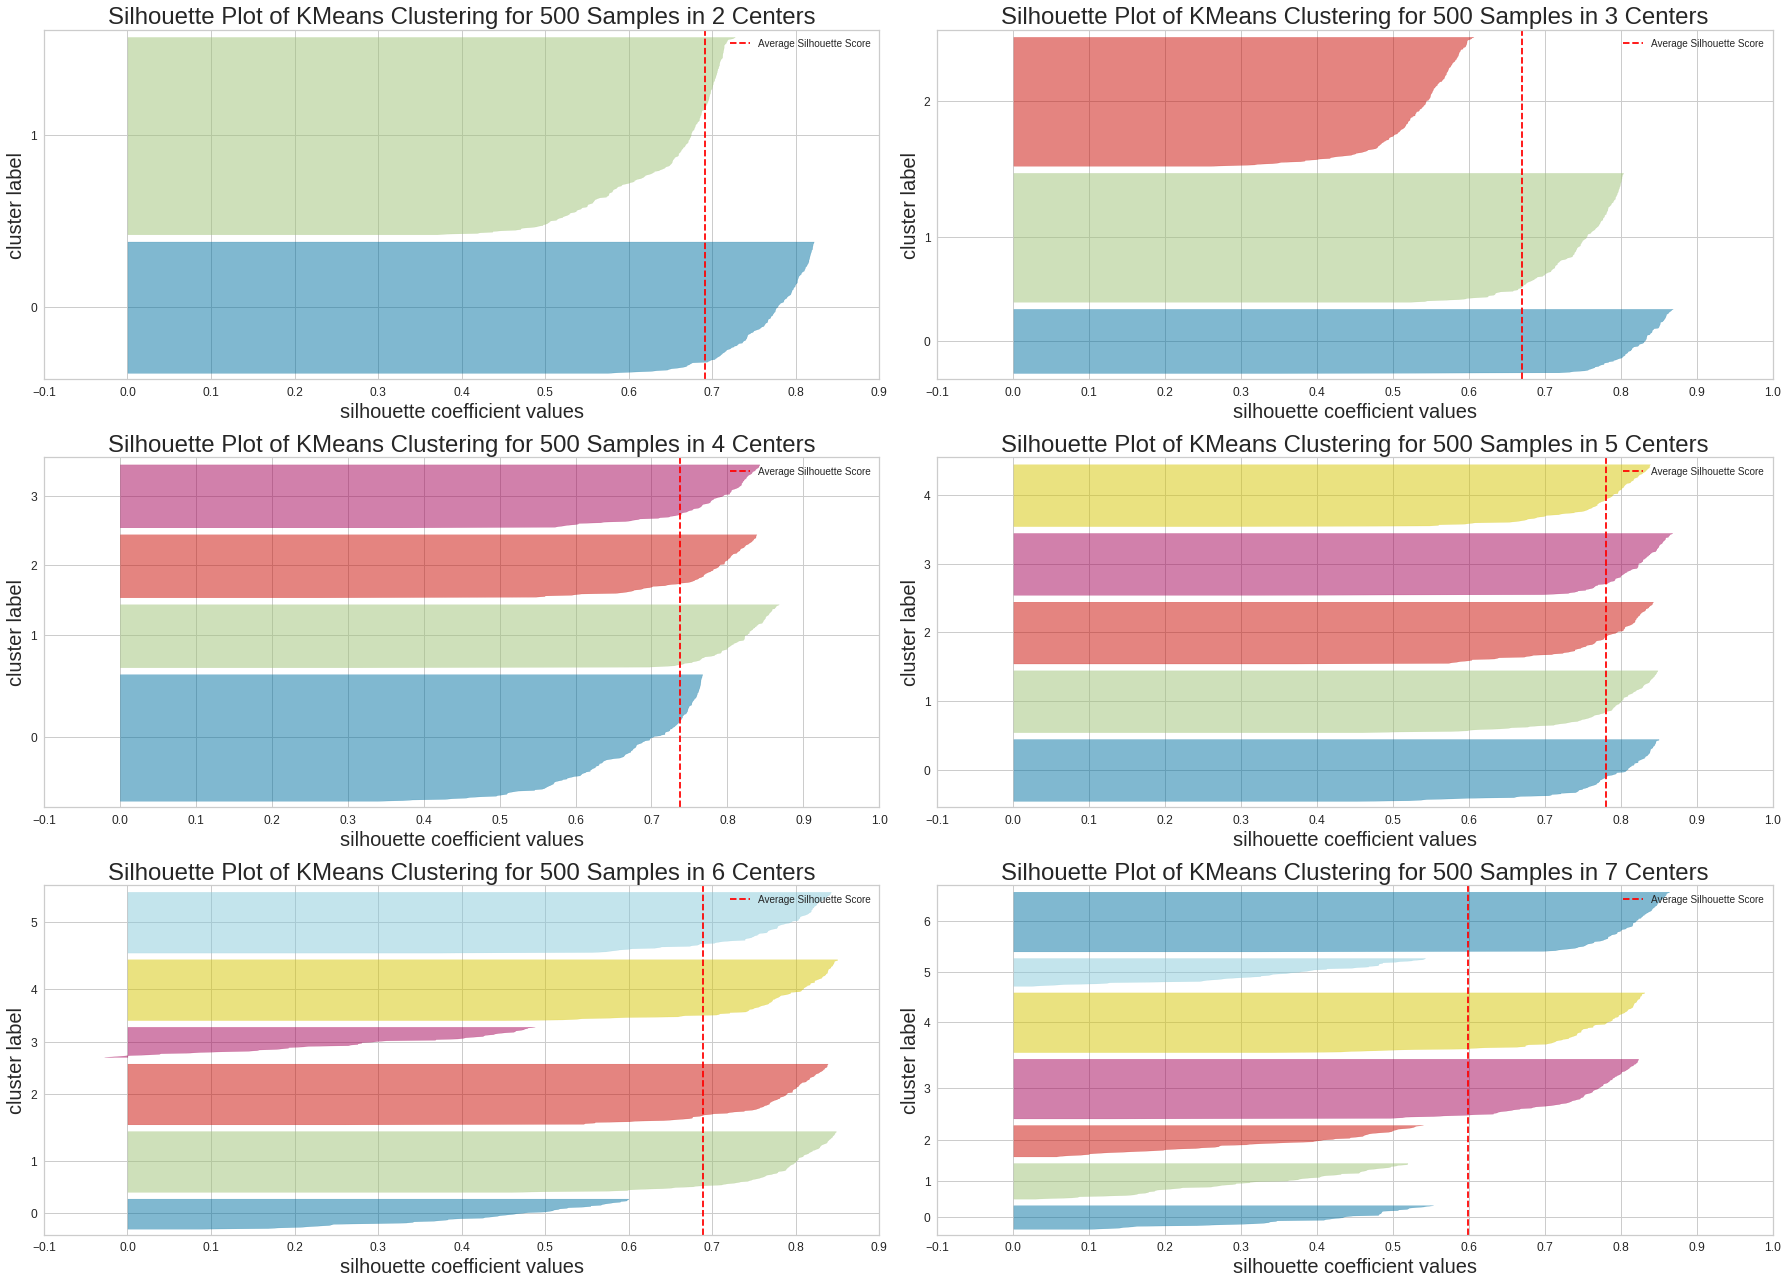

In [10]:
fig, ax = plt.subplots(3,2, figsize=(25, 18))


for k in clusters:
    km = c.KMeans(n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    
    q, mod = divmod(k, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)
    visualizer.finalize()
    
plt.tight_layout()

In [11]:
# Model Training -  K-Means
k = 4
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

# UMAP

UMAP, t-SNE (2009) - usam a abordagem de manifold - por topologia (são gráficos de alto dimensionalidade)

Na lua consigo ver a topologia do planeta terra, que são as montanhas, vales. Semelhante ao espaço de dados, feature com pesos maiores distorcem mais os dados


Cluster projetado em alta dimensionalidade - O que isso significa?
(projeção de um espaço multidimensional para um espaço de 2 dimensões)

UMAP dá uma ideia de como está o cluster em alta dimensionalidade. Diferente de t-SNE o UMAP é melhor quando tem muitos dados,  e o t-SNE é mais pesado.


In [12]:
df_viz = pd.DataFrame(X)
df_viz['cluster'] = labels

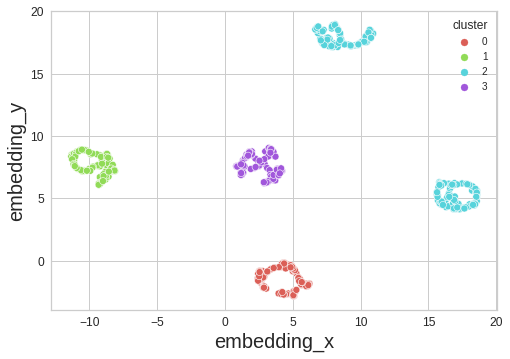

In [13]:
reducer = umap.UMAP( n_neighbors=10, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x'] = embedding[:, 0]
df_viz['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 hue='cluster', 
                 palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
                 data=df_viz );

Artigo publicado no medium [clique aqui](https://medium.com/@starting-ds/clusteriza%C3%A7%C3%A3o-e-suas-m%C3%A9tricas-899b8017823d)





















.

Fontes:
    

https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891